In [1]:
import json
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
# def convert_decimal_date(decimal_date):
#     year = int(decimal_date)
#     remainder = decimal_date - year
#     base_date = datetime(year, 1, 1)
#     result_date = base_date + (base_date.replace(year=year + 1) - base_date) * remainder
#     return result_date.strftime("%Y-%m-%d")

In [3]:
# # Read the JSON file
# with open('sarakhs.json', 'r') as f:
#     data = json.load(f)

In [4]:
# for station in data['station']:
#     station['Day'] = convert_decimal_date(float(station['Day']))

# # Write the modified data to a new JSON file
# with open('modified_json_file.json', 'w') as f:
#     json.dump(data, f, indent=4)  # indent=4 for pretty printing

# print("Conversion completed. Modified JSON file saved.")

In [5]:
# Read the modified JSON file
with open('modified_json_file.json', 'r') as f:
    data = json.load(f)

# Create a DataFrame from the JSON data
df = pd.DataFrame(data['station'])

# Export the "Day" and "Shift_U" columns to an Excel file
df[['Day', 'Shift_U']].to_excel('output.xlsx', index=False)

print("Export to Excel completed. Excel file saved.")


Export to Excel completed. Excel file saved.


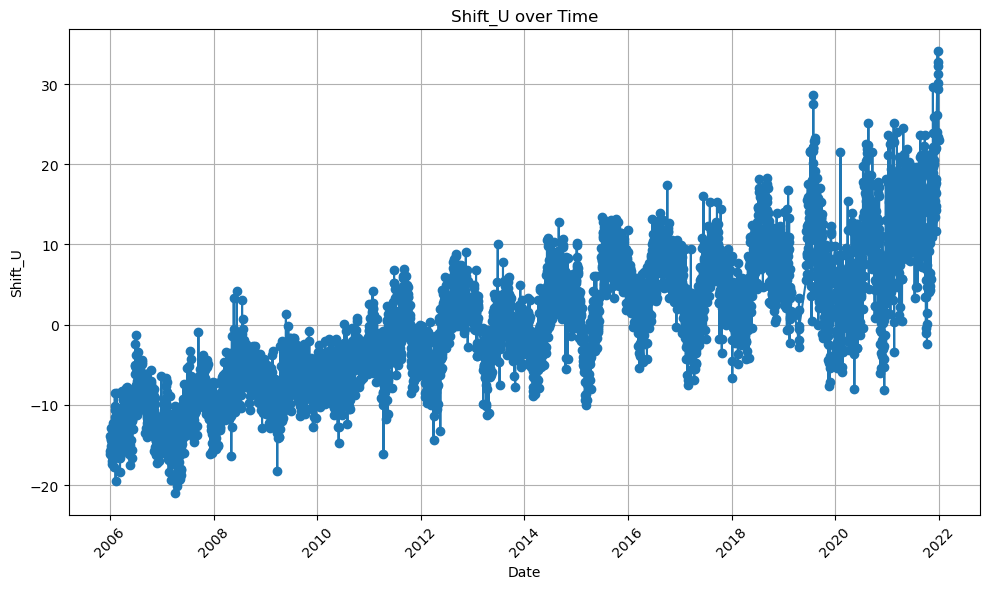

In [6]:
df = pd.read_excel('SARK.xlsx')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Day'], df['disp'], marker='o', linestyle='-')
plt.title('Shift_U over Time')
plt.xlabel('Date')
plt.ylabel('Shift_U')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

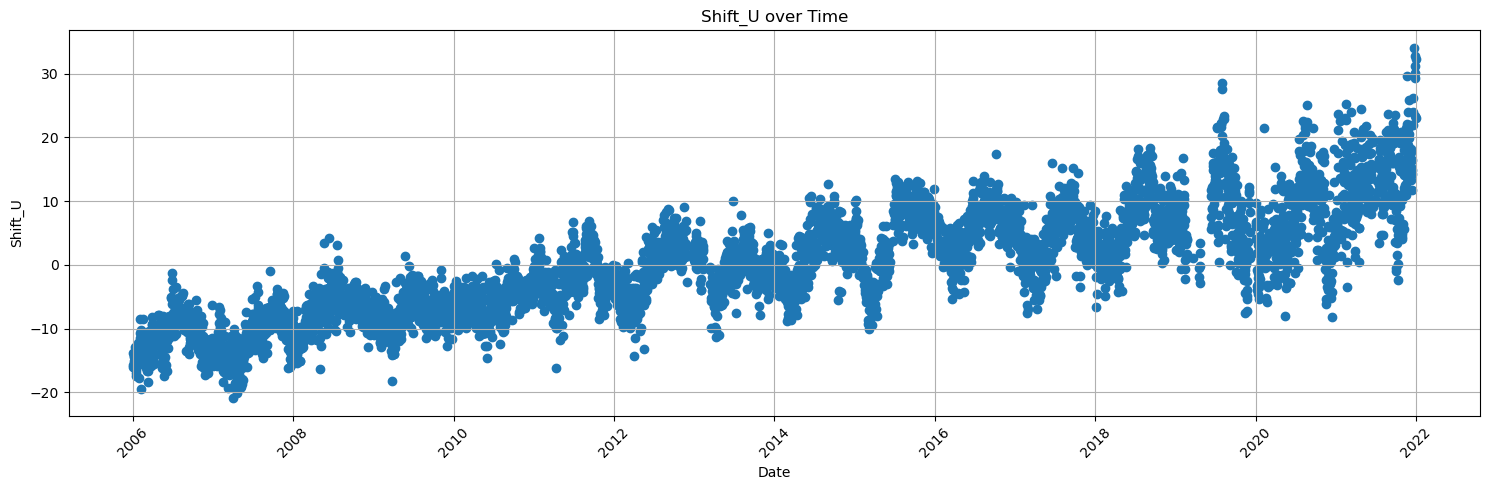

In [7]:

# Plot the data
plt.figure(figsize=(15, 5))
plt.scatter(df['Day'], df['disp'], marker='o')
plt.title('Shift_U over Time')
plt.xlabel('Date')
plt.ylabel('Shift_U')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


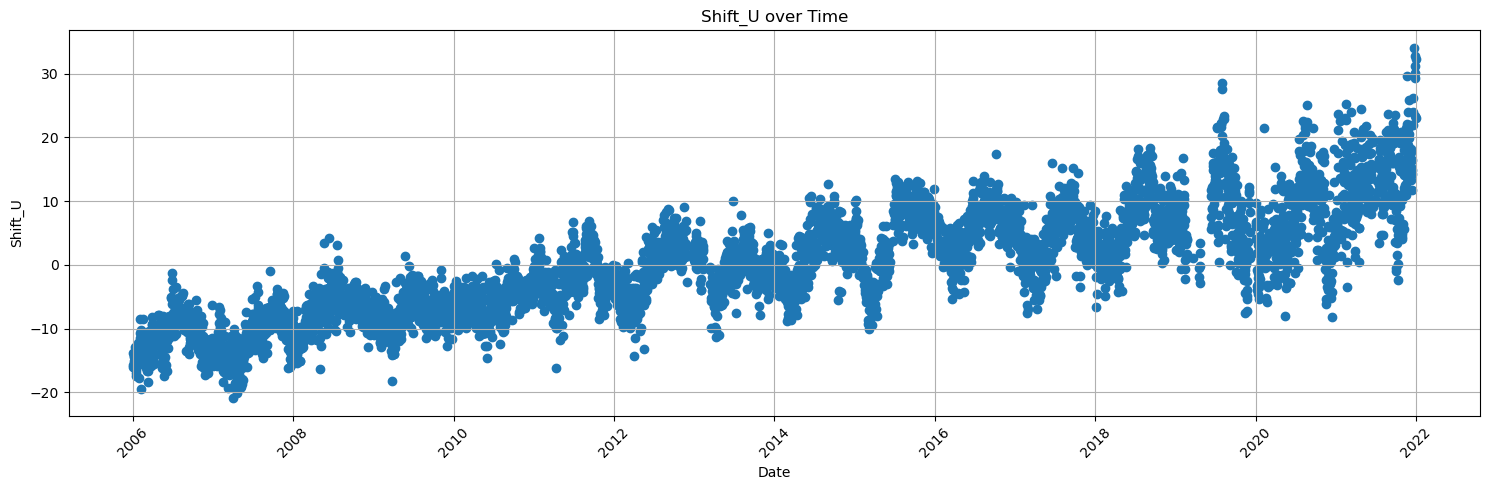

In [8]:

# Plot the data
plt.figure(figsize=(15, 5))
plt.scatter(df['Day'], df['disp'], marker='o')
plt.title('Shift_U over Time')
plt.xlabel('Date')
plt.ylabel('Shift_U')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


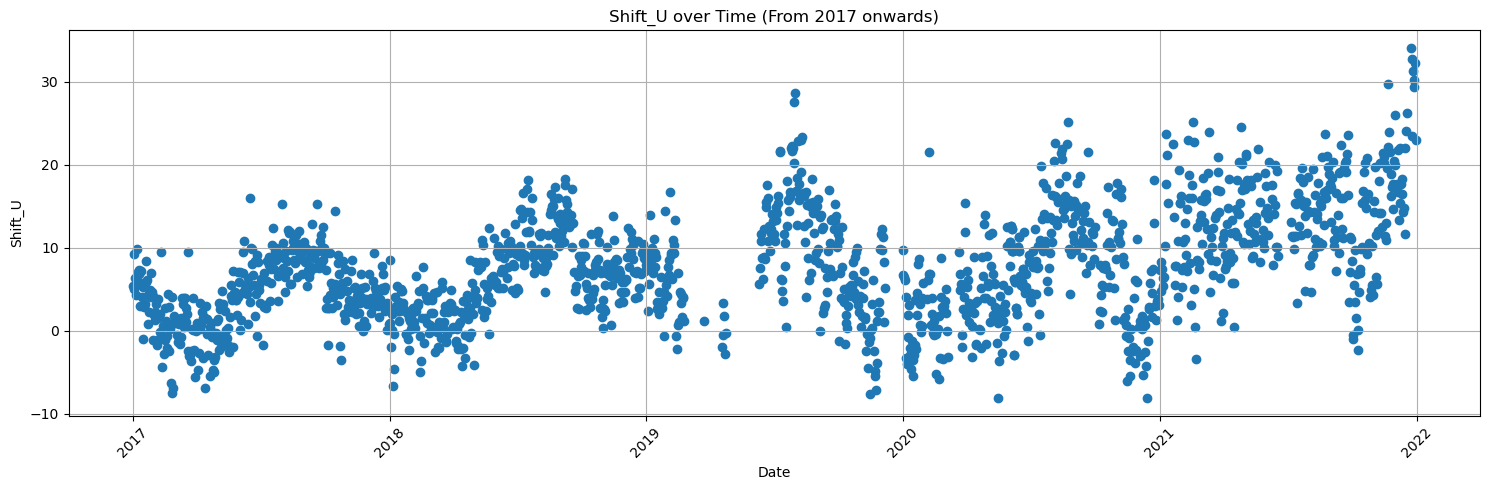

In [9]:
df_2017_onwards = df[df['Day'] >= '2017-01-01']

# Plot the filtered data
plt.figure(figsize=(15, 5))
plt.scatter(df_2017_onwards['Day'], df_2017_onwards['disp'], marker='o')
plt.title('Shift_U over Time (From 2017 onwards)')
plt.xlabel('Date')
plt.ylabel('Shift_U')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

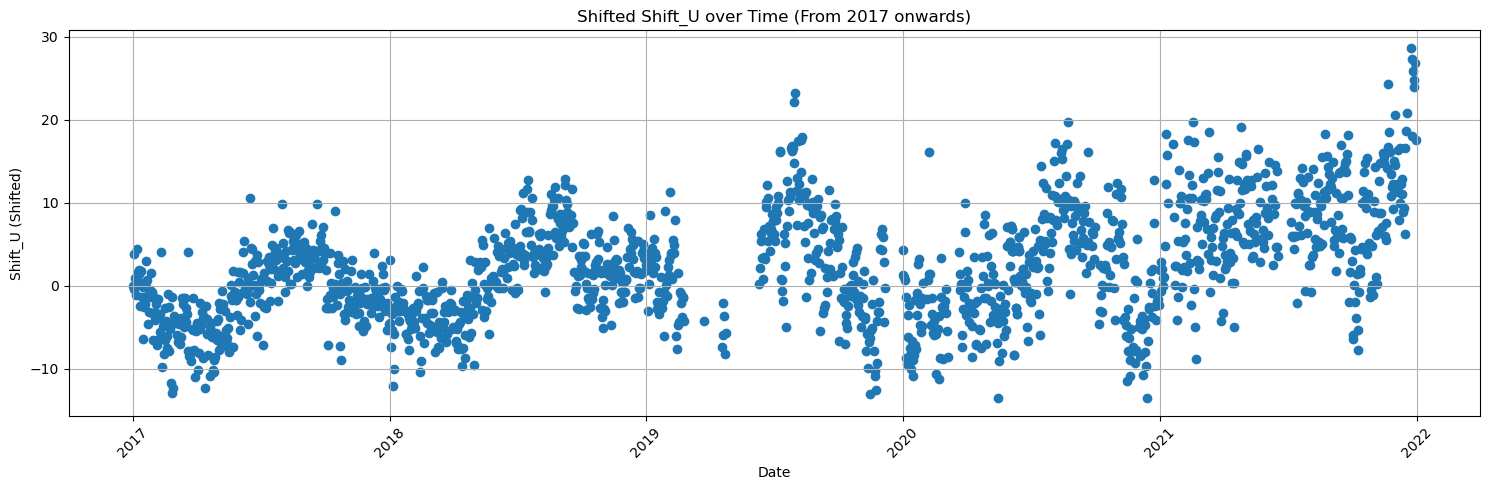

In [10]:
# Filter data for dates from 2017 onwards
df_2017_onwards = df[df['Day'] >= '2017-01-01'].copy()  # Make a copy to avoid the SettingWithCopyWarning

# Find the index of the first data point in 2017
first_index_2017 = df_2017_onwards.index[0]

# Get the value of the first data point in 2017
first_value_2017 = df_2017_onwards.iloc[0]['disp']

# Subtract the value of the first data point in 2017 from all data points
df_2017_onwards['disp_shifted'] = df_2017_onwards['disp'] - first_value_2017

# Plot the shifted data
plt.figure(figsize=(15, 5))
plt.scatter(df_2017_onwards['Day'], df_2017_onwards['disp_shifted'], marker='o')
plt.title('Shifted Shift_U over Time (From 2017 onwards)')
plt.xlabel('Date')
plt.ylabel('Shift_U (Shifted)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
df_2017_onwards.to_excel("2017_onwards_GPS.xlsx", index=False)

In [11]:
subs = pd.read_excel('TS.xlsx')

In [12]:

# Plot the data
plt.figure(figsize=(15, 5))
plt.scatter(subs['date'], subs['aux'], marker='o')
plt.title('Shift_U over Time')
plt.xlabel('Date')
plt.ylabel('Shift_U')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


KeyError: 'date'

<Figure size 1500x500 with 0 Axes>

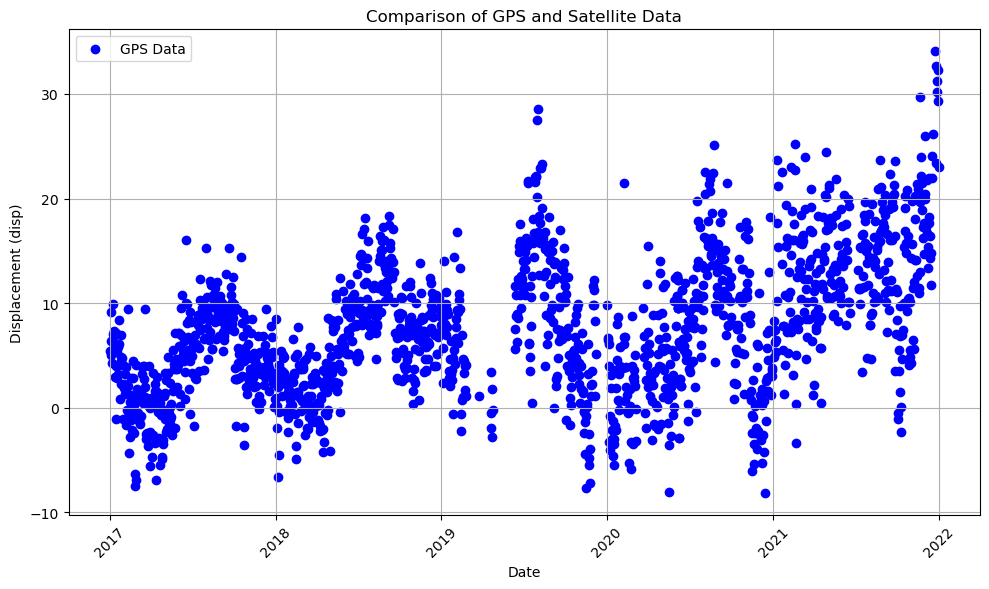

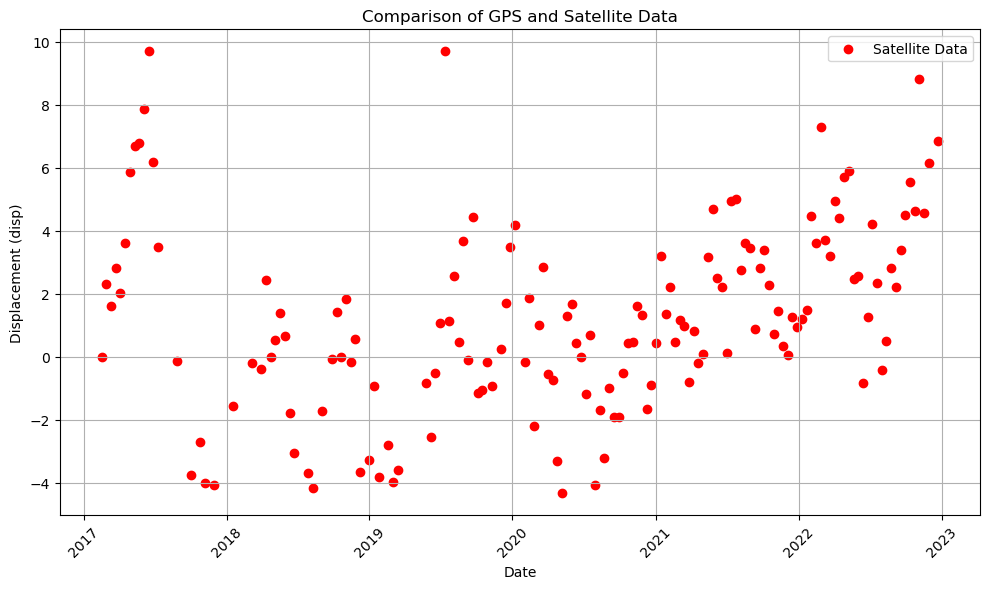

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from 2017_onwards_GPS.xlsx
df_gps = pd.read_excel("2017_onwards_GPS.xlsx")

# Load data from TS.xlsx
df_satellite = pd.read_excel("TS.xlsx")

# Plot scatter plot for GPS data
plt.figure(figsize=(10, 6))
plt.scatter(df_gps['Day'], df_gps['disp'], color='blue', label='GPS Data')
plt.title('Comparison of GPS and Satellite Data')
plt.xlabel('Date')
plt.ylabel('Displacement (disp)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot scatter plot for satellite data
plt.figure(figsize=(10, 6))
plt.scatter(df_satellite['Day'], df_satellite['aux'], color='red', label='Satellite Data')
plt.title('Comparison of GPS and Satellite Data')
plt.xlabel('Date')
plt.ylabel('Displacement (disp)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


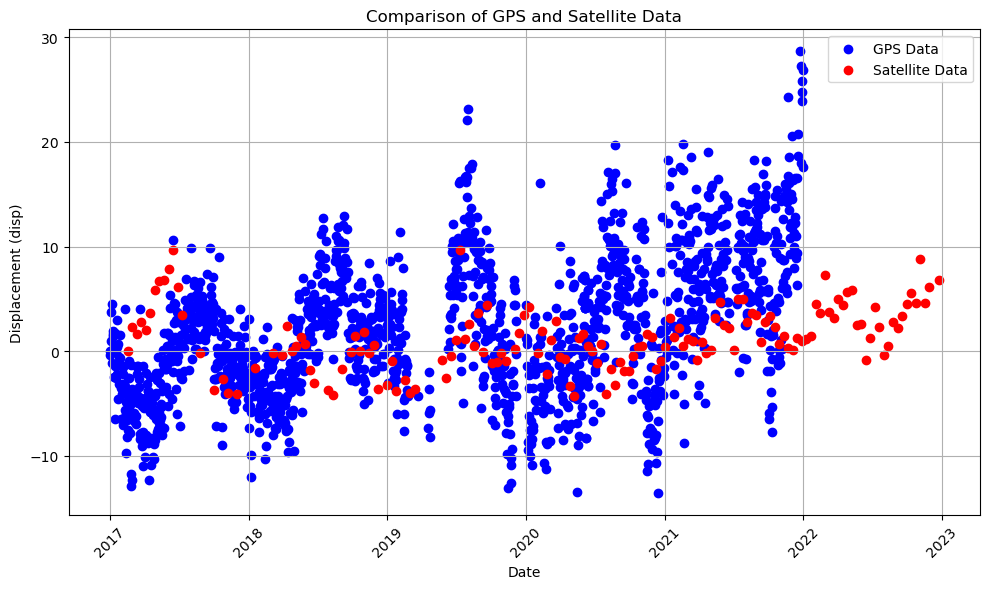

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df_gps['Day'], df_gps['disp_shifted'], color='blue', label='GPS Data')
plt.scatter(df_satellite['Day'], df_satellite['aux'], color='red', label='Satellite Data')
plt.title('Comparison of GPS and Satellite Data')
plt.xlabel('Date')
plt.ylabel('Displacement (disp)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


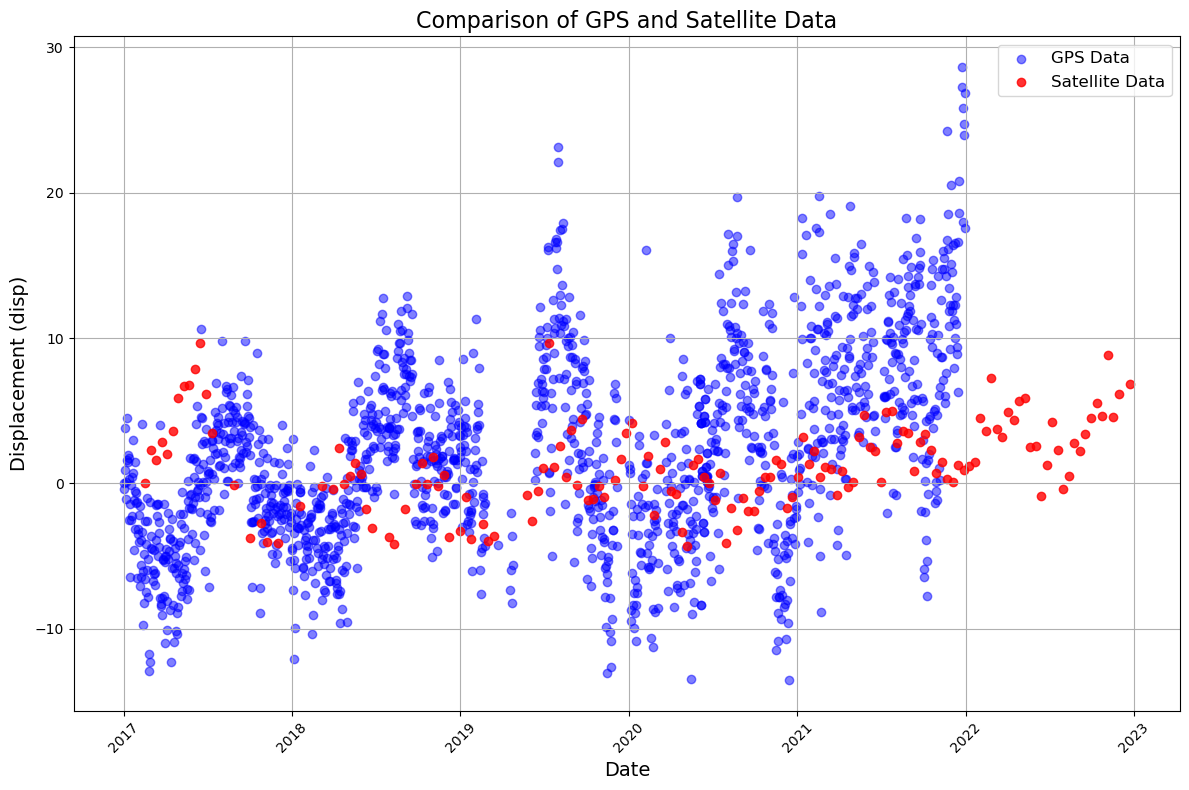

In [15]:
# Set figure size and create plot
plt.figure(figsize=(12, 8))

# Plot GPS data with transparency
plt.scatter(df_gps['Day'], df_gps['disp_shifted'], color='blue', label='GPS Data', alpha=0.5)

# Plot satellite data with transparency
plt.scatter(df_satellite['Day'], df_satellite['aux'], color='red', label='Satellite Data', alpha=0.8)

# Add title and axis labels
plt.title('Comparison of GPS and Satellite Data', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Displacement (disp)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend(fontsize=12)

# Add grid
plt.grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


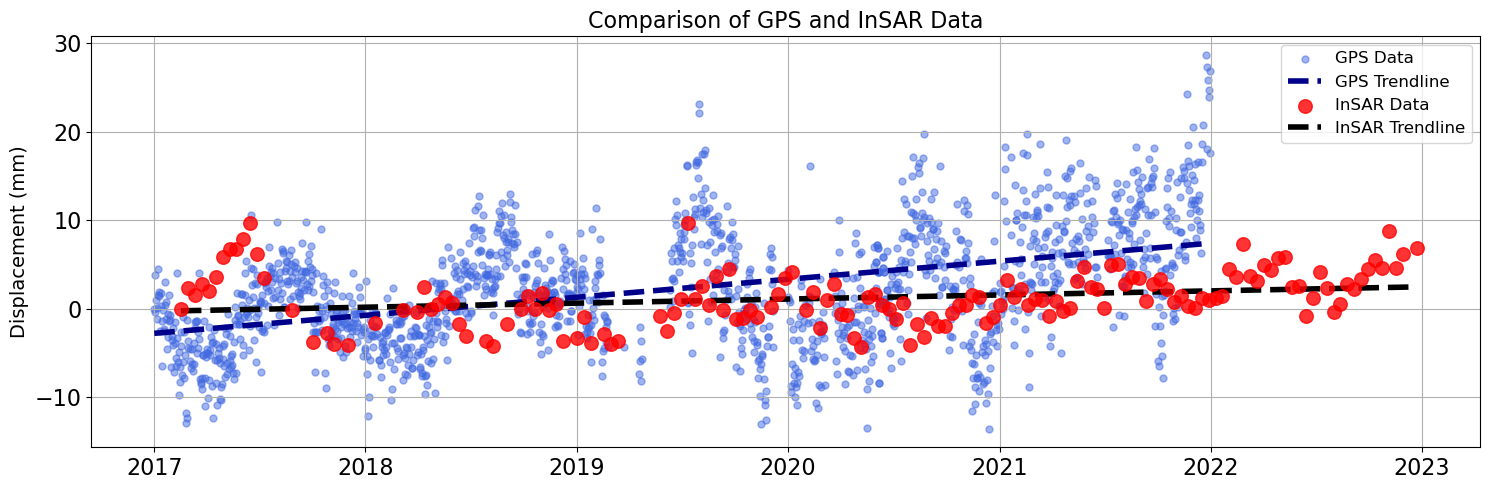

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load data from 2017_onwards_GPS.xlsx
df_gps = pd.read_excel("2017_onwards_GPS.xlsx")

# Load data from TS.xlsx
df_satellite = pd.read_excel("TS.xlsx")

# Convert datetime to ordinal values
df_gps['Day_ordinal'] = pd.to_datetime(df_gps['Day']).apply(lambda date: date.toordinal())
df_satellite['Day_ordinal'] = pd.to_datetime(df_satellite['Day']).apply(lambda date: date.toordinal())

# Set figure size and create plot
plt.figure(figsize=(15, 5))

# Plot GPS data with transparency
plt.scatter(df_gps['Day'], df_gps['disp_shifted'], color='royalblue', label='GPS Data', alpha=0.5,s=25)

# Fit linear regression model to GPS data
gps_model = LinearRegression().fit(df_gps['Day_ordinal'].values.reshape(-1, 1), df_gps['disp_shifted'])
gps_trendline = gps_model.predict(df_gps['Day_ordinal'].values.reshape(-1, 1))
plt.plot(df_gps['Day'], gps_trendline, color='darkblue', linestyle='--', linewidth=4, label='GPS Trendline')

# Plot satellite data with transparency
plt.scatter(df_satellite['Day'], df_satellite['aux'], color='red', label='InSAR Data', alpha=0.8,s=95,zorder=100)

# Fit linear regression model to satellite data
satellite_model = LinearRegression().fit(df_satellite['Day_ordinal'].values.reshape(-1, 1), df_satellite['aux'])
satellite_trendline = satellite_model.predict(df_satellite['Day_ordinal'].values.reshape(-1, 1))
plt.plot(df_satellite['Day'], satellite_trendline, color='black', linestyle='--',linewidth=4, label='InSAR Trendline')

# Add title and axis labels
plt.title('Comparison of GPS and InSAR Data', fontsize=16)
#plt.xlabel('Date', fontsize=14)
plt.ylabel('Displacement (mm)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
# Add legend
plt.legend(fontsize=12)

# Add grid
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.savefig("Comparison of GPS and InSAR Data.png",dpi=300)
# Show plot
plt.show()


In [ ]:
correlation = df_gps['disp_shifted'].corr(df_satellite['aux'])

In [ ]:
print("Correlation between GPS displacement and InSAR displacement:", correlation)

In [17]:
# Set figure size and create plot
plt.figure(figsize=(15, 5))

# Plot GPS data with transparency
plt.scatter(df_aver['date'], df_aver['Averaged'], color='blue', label='GPS Data', alpha=0.5)

# Plot satellite data with transparency
plt.scatter(df_aver['date'], df_aver['insar'], color='red', label='Satellite Data', alpha=0.8)

# Add title and axis labels
plt.title('Comparison of GPS and Satellite Data', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Displacement (disp)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend(fontsize=12)

# Add grid
plt.grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


NameError: name 'df_aver' is not defined

<Figure size 1500x500 with 0 Axes>

In [ ]:
plt.scatter(df_aver['insar'], df_aver['Averaged'], color='red', label='InSAR Data', alpha=0.8,s=95,zorder=100)

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load data from 2017_onwards_GPS.xlsx


# Convert datetime to ordinal values
df_aver = pd.read_excel("SARK.xlsx", sheet_name="Sheet5")
df_satellite['Day_ordinal'] = pd.to_datetime(df_satellite['Day']).apply(lambda date: date.toordinal())

# Set figure size and create plot
plt.figure(figsize=(15, 5))

# Plot GPS data with transparency
plt.scatter(df_gps['Day'], df_gps['disp_shifted'], color='royalblue', label='GPS Data', alpha=0.5,s=25)

# Fit linear regression model to GPS data
gps_model = LinearRegression().fit(df_gps['Day_ordinal'].values.reshape(-1, 1), df_gps['disp_shifted'])
gps_trendline = gps_model.predict(df_gps['Day_ordinal'].values.reshape(-1, 1))
plt.plot(df_gps['Day'], gps_trendline, color='darkblue', linestyle='--', linewidth=4, label='GPS Trendline')

# Plot satellite data with transparency
plt.scatter(df_satellite['Day'], df_satellite['aux'], color='red', label='InSAR Data', alpha=0.8,s=95,zorder=100)

# Fit linear regression model to satellite data
satellite_model = LinearRegression().fit(df_satellite['Day_ordinal'].values.reshape(-1, 1), df_satellite['aux'])
satellite_trendline = satellite_model.predict(df_satellite['Day_ordinal'].values.reshape(-1, 1))
plt.plot(df_satellite['Day'], satellite_trendline, color='black', linestyle='--',linewidth=4, label='InSAR Trendline')

# Add title and axis labels
plt.title('Comparison of GPS and InSAR Data', fontsize=16)
#plt.xlabel('Date', fontsize=14)
plt.ylabel('Displacement (mm)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
# Add legend
plt.legend(fontsize=12)

# Add grid
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.savefig("Comparison of GPS and InSAR Data.png",dpi=300)
# Show plot
plt.show()


KeyError: 'Day'

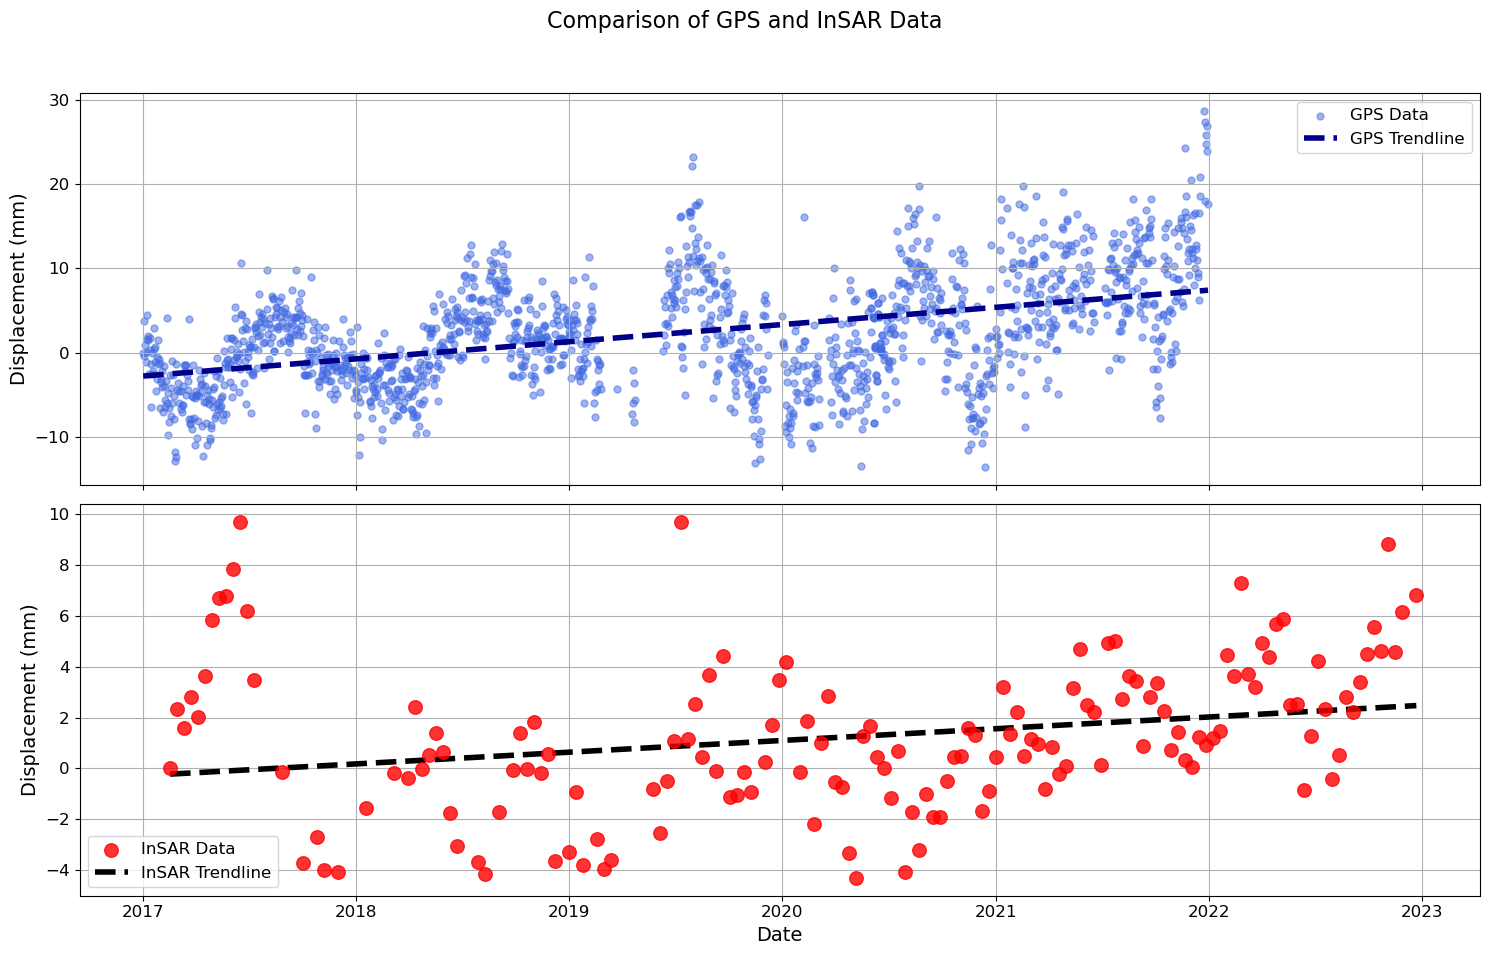

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load data from 2017_onwards_GPS.xlsx
df_gps = pd.read_excel("2017_onwards_GPS.xlsx")

# Load data from TS.xlsx
df_satellite = pd.read_excel("TS.xlsx")

# Convert datetime to ordinal values
df_gps['Day_ordinal'] = pd.to_datetime(df_gps['Day']).apply(lambda date: date.toordinal())
df_satellite['Day_ordinal'] = pd.to_datetime(df_satellite['Day']).apply(lambda date: date.toordinal())

# Set figure size and create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Plot GPS data
ax1.scatter(df_gps['Day'], df_gps['disp_shifted'], color='royalblue', label='GPS Data', alpha=0.5, s=25)
gps_model = LinearRegression().fit(df_gps['Day_ordinal'].values.reshape(-1, 1), df_gps['disp_shifted'])
gps_trendline = gps_model.predict(df_gps['Day_ordinal'].values.reshape(-1, 1))
ax1.plot(df_gps['Day'], gps_trendline, color='darkblue', linestyle='--', linewidth=4, label='GPS Trendline')
ax1.set_ylabel('Displacement (mm)', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.legend(fontsize=12)
ax1.grid(True)

# Plot InSAR data
ax2.scatter(df_satellite['Day'], df_satellite['aux'], color='red', label='InSAR Data', alpha=0.8, s=95, zorder=100)
satellite_model = LinearRegression().fit(df_satellite['Day_ordinal'].values.reshape(-1, 1), df_satellite['aux'])
satellite_trendline = satellite_model.predict(df_satellite['Day_ordinal'].values.reshape(-1, 1))
ax2.plot(df_satellite['Day'], satellite_trendline, color='black', linestyle='--', linewidth=4, label='InSAR Trendline')
ax2.set_ylabel('Displacement (mm)', fontsize=14)
ax2.set_xlabel('Date', fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.legend(fontsize=12)
ax2.grid(True)

# Add title
plt.suptitle('Comparison of GPS and InSAR Data', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("Comparison of GPS and InSAR Data.png", dpi=300)
# Show plot
plt.show()


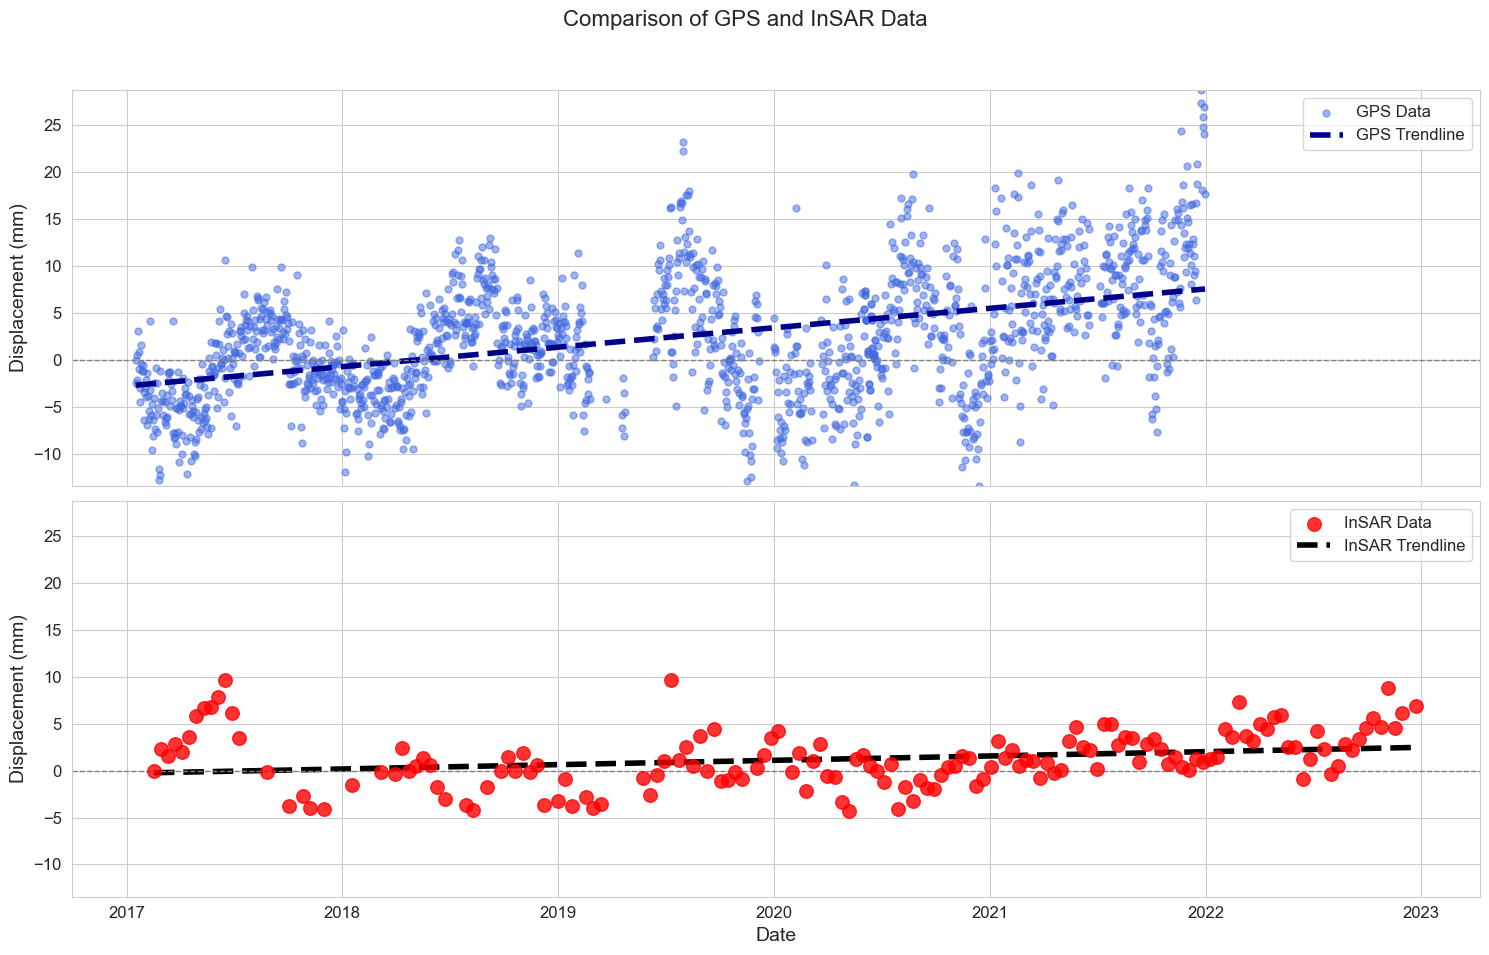

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load data from 2017_onwards_GPS.xlsx
df_gps = pd.read_excel("2017_onwards_GPS.xlsx")

# Load data from TS.xlsx
df_satellite = pd.read_excel("TS.xlsx")

# Convert datetime to ordinal values
df_gps['Day_ordinal'] = pd.to_datetime(df_gps['Day']).apply(lambda date: date.toordinal())
df_satellite['Day_ordinal'] = pd.to_datetime(df_satellite['Day']).apply(lambda date: date.toordinal())

# Set figure size and create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Plot GPS data
gps_scatter = ax1.scatter(df_gps['Day'], df_gps['disp_shifted'], color='royalblue', label='GPS Data', alpha=0.5, s=25)
gps_model = LinearRegression().fit(df_gps['Day_ordinal'].values.reshape(-1, 1), df_gps['disp_shifted'])
gps_trendline = gps_model.predict(df_gps['Day_ordinal'].values.reshape(-1, 1))
ax1.plot(df_gps['Day'], gps_trendline, color='darkblue', linestyle='--', linewidth=4, label='GPS Trendline')
ax1.set_ylabel('Displacement (mm)', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.legend(fontsize=12)
ax1.grid(True)

# Plot InSAR data
satellite_scatter = ax2.scatter(df_satellite['Day'], df_satellite['aux'], color='red', label='InSAR Data', alpha=0.8, s=95, zorder=100)
satellite_model = LinearRegression().fit(df_satellite['Day_ordinal'].values.reshape(-1, 1), df_satellite['aux'])
satellite_trendline = satellite_model.predict(df_satellite['Day_ordinal'].values.reshape(-1, 1))
ax2.plot(df_satellite['Day'], satellite_trendline, color='black', linestyle='--', linewidth=4, label='InSAR Trendline')
ax2.set_ylabel('Displacement (mm)', fontsize=14)
ax2.set_xlabel('Date', fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.legend(fontsize=12)
ax2.grid(True)

# Set the same y-axis limits for both subplots
max_y = max(df_gps['disp_shifted'].max(), df_satellite['aux'].max())
min_y = min(df_gps['disp_shifted'].min(), df_satellite['aux'].min())
ax1.set_ylim(min_y, max_y)
ax2.set_ylim(min_y, max_y)
import seaborn as sns

# Set the style to "gray"
sns.set_style("ticks")
# Add title
plt.suptitle('Comparison of GPS and InSAR Data', fontsize=16)
ax1.axhline(y=0, color='grey', linestyle='--', linewidth=1)
ax2.axhline(y=0, color='grey', linestyle='--', linewidth=1)
# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("Comparison of GPS and InSAR Data white.png", dpi=300)
# Show plot
plt.show()


C:\Users\sorou\AppData\Local\Temp\ipykernel_20132\259754682.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


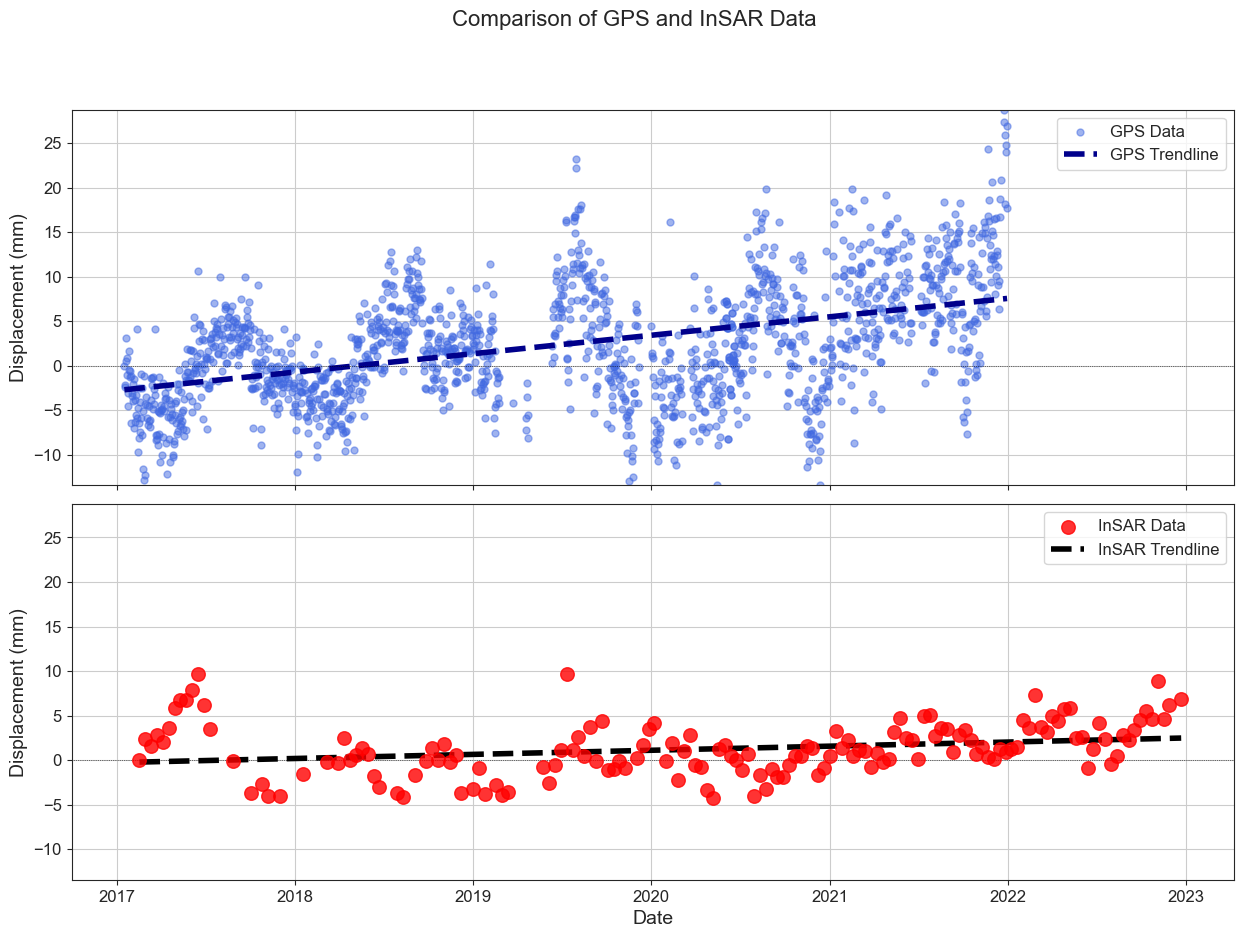

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load data from 2017_onwards_GPS.xlsx
df_gps = pd.read_excel("2017_onwards_GPS.xlsx")

# Load data from TS.xlsx
df_satellite = pd.read_excel("TS.xlsx")

# Convert datetime to ordinal values
df_gps['Day_ordinal'] = pd.to_datetime(df_gps['Day']).apply(lambda date: date.toordinal())
df_satellite['Day_ordinal'] = pd.to_datetime(df_satellite['Day']).apply(lambda date: date.toordinal())

# Set Seaborn style to "gray"
sns.set_style("ticks")

# Set figure size and create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True, gridspec_kw={'hspace': 0.05})

# Plot GPS data
gps_scatter = ax1.scatter(df_gps['Day'], df_gps['disp_shifted'], color='royalblue', label='GPS Data', alpha=0.5, s=25)
gps_model = LinearRegression().fit(df_gps['Day_ordinal'].values.reshape(-1, 1), df_gps['disp_shifted'])
gps_trendline = gps_model.predict(df_gps['Day_ordinal'].values.reshape(-1, 1))
ax1.plot(df_gps['Day'], gps_trendline, color='darkblue', linestyle='--', linewidth=4, label='GPS Trendline')
ax1.set_ylabel('Displacement (mm)', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.legend(fontsize=12)
ax1.grid(True)

# Plot InSAR data
satellite_scatter = ax2.scatter(df_satellite['Day'], df_satellite['aux'], color='red', label='InSAR Data', alpha=0.8, s=95, zorder=100)
satellite_model = LinearRegression().fit(df_satellite['Day_ordinal'].values.reshape(-1, 1), df_satellite['aux'])
satellite_trendline = satellite_model.predict(df_satellite['Day_ordinal'].values.reshape(-1, 1))
ax2.plot(df_satellite['Day'], satellite_trendline, color='black', linestyle='--', linewidth=4, label='InSAR Trendline')
ax2.set_ylabel('Displacement (mm)', fontsize=14)
ax2.set_xlabel('Date', fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.legend(fontsize=12)
ax2.grid(True)

# Set the same y-axis limits for both subplots
max_y = max(df_gps['disp_shifted'].max(), df_satellite['aux'].max())
min_y = min(df_gps['disp_shifted'].min(), df_satellite['aux'].min())
ax1.set_ylim(min_y, max_y)
ax2.set_ylim(min_y, max_y)

# Add dotted line at y=0 in both subplots
ax1.axhline(y=0, color='k', linestyle=':', linewidth=0.5)
ax2.axhline(y=0, color='k', linestyle=':', linewidth=0.5)

# Add title
plt.suptitle('Comparison of GPS and InSAR Data', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("Comparison of GPS and InSAR Data gird.png", dpi=300)
# Show plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load data from 2017_onwards_GPS.xlsx
df_gps = pd.read_excel("2017_onwards_GPS.xlsx")

# Load data from TS.xlsx
df_satellite = pd.read_excel("TS.xlsx")

# Convert datetime to ordinal values
df_gps['Day_ordinal'] = pd.to_datetime(df_gps['Day']).apply(lambda date: date.toordinal())
df_satellite['Day_ordinal'] = pd.to_datetime(df_satellite['Day']).apply(lambda date: date.toordinal())

# Set Seaborn style to "gray"
sns.set_style("ticks")

# Set figure size and create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True, gridspec_kw={'hspace': 0.05})

# Plot GPS data
gps_scatter = ax1.scatter(df_gps['Day'], df_gps['disp_shifted'], color='royalblue', label='GPS Data', alpha=0.5, s=25)
gps_model = LinearRegression().fit(df_gps['Day_ordinal'].values.reshape(-1, 1), df_gps['disp_shifted'])
gps_trendline = gps_model.predict(df_gps['Day_ordinal'].values.reshape(-1, 1))
ax1.plot(df_gps['Day'], gps_trendline, color='darkblue', linestyle='--', linewidth=4, label='GPS Trendline')
ax1.set_ylabel('Displacement (mm)', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.legend(fontsize=12)
ax1.grid(True)

# Plot InSAR data
satellite_scatter = ax2.scatter(df_satellite['Day'], df_satellite['aux'], color='red', label='InSAR Data', alpha=0.8, s=95, zorder=100)
satellite_model = LinearRegression().fit(df_satellite['Day_ordinal'].values.reshape(-1, 1), df_satellite['aux'])
satellite_trendline = satellite_model.predict(df_satellite['Day_ordinal'].values.reshape(-1, 1))
ax2.plot(df_satellite['Day'], satellite_trendline, color='black', linestyle='--', linewidth=4, label='InSAR Trendline')
ax2.set_ylabel('Displacement (mm)', fontsize=14)
ax2.set_xlabel('Date', fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.legend(fontsize=12)
ax2.grid(True)

# Set the same y-axis limits for both subplots
max_y = max(df_gps['disp_shifted'].max(), df_satellite['aux'].max())
min_y = min(df_gps['disp_shifted'].min(), df_satellite['aux'].min())
ax1.set_ylim(min_y, max_y)
ax2.set_ylim(min_y, max_y)

# Add dotted line at y=0 in both subplots
ax1.axhline(y=0, color='k', linestyle=':', linewidth=0.5)
ax2.axhline(y=0, color='k', linestyle=':', linewidth=0.5)

# Add title
plt.suptitle('Comparison of GPS and InSAR Data', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("Comparison of GPS and InSAR Data gird.png", dpi=300)
# Show plot
plt.show()
